In [1]:
%matplotlib inline

In [2]:
from pylab import *
from random import *
from scipy import *
from scipy import optimize
from matplotlib import *
import csv, sys
import re,pyfits,math
import numpy as np
ion()
from scipy import stats
from scipy.optimize import curve_fit
import scipy.interpolate
rcdefaults()
matplotlib.rc('font',family='Bitstream Vera Serif')
import pandas as pd
from pandas import datetime

In [11]:
def load_clean(i):
    tab = pd.read_excel('/Users/Rachel/Desktop/Apples/table2'+str(i)+'.xls', skiprows=1, skip_footer=2, na_values=['--','     N.A.'])
    df = pd.DataFrame(tab)
    df = df.dropna()
    df.columns = [i.strip() for i in df.columns]
    pattern = re.compile(r'\s+')
    df.columns = [re.sub(pattern, '', lab) for lab in df.columns]
    df = pd.melt(df, id_vars = ["Year"], value_vars = [u'Jan.', u'Feb.', u'Mar.', u'Apr.', u'May.', u'June', u'July',
                                                       u'Aug.', u'Sep.', u'Oct.', u'Nov.', u'Dec.'])
    return df

In [12]:
df = load_clean(1)
months = {'Apr.': 4, 'Aug.': 8, 'Dec.': 12, 'Feb.': 2, 'Jan.': 1, 'July': 7, 'June': 6, 'Mar.': 3, 'May.': 5, 'Nov.': 11, 'Oct.': 10, 'Sep.': 9}
df["month_number"] = df["variable"].map(months)
#df

In [13]:
FullTable = load_clean(0)
for i in range(1,4):
    df = load_clean(i)
    FullTable = FullTable.merge(df, on=['Year','variable'], how='inner')#, axis=1)#, join='inner')
    
FullTable["month_number"] = FullTable["variable"].map(months)    
FullTable = pd.DataFrame(FullTable.sort(['Year','month_number']))  #### sort by year --> need to figure out how to sort by month also
FullTable = FullTable.reset_index(drop=True)   #### reset the index after sort
FullTable = FullTable.apply(lambda x:x.fillna(x.value_counts().index[0]))   ### imputing for NAs
FullTable.columns = ['Year', 'Month', 'freshprice', 'redprice', 'freshstock', 'frozenstock','MonthNum']

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [14]:
FullTable

,Year,Month,freshprice,redprice,freshstock,frozenstock,MonthNum
0,1980.0,Jan.,0.141,0.554,2226.463,83.908,1
1,1980.0,Feb.,0.149,0.574,1597.172,86.812,2
2,1980.0,Mar.,0.166,0.593,1046.602,81.099,3
3,1980.0,Apr.,0.170,0.634,651.180,68.875,4
4,1980.0,May.,0.179,0.974,3332.901,78.661,5
5,1980.0,June,0.210,0.701,140.178,55.784,6
6,1980.0,July,0.246,0.753,19.699,50.129,7
7,1980.0,Aug.,0.175,0.807,3.394,42.170,8
8,1980.0,Sep.,0.157,0.702,1550.085,36.022,9
9,1980.0,Oct.,0.125,0.570,4366.534,43.775,10


In [18]:
def parser(X,Y):
    return [datetime.strptime(str(int(x))+'-'+str(y), '%Y-%m') for x,y in zip(X,Y)]
FullTable['dates'] = parser(FullTable['Year'], FullTable['MonthNum'])

In [73]:
from sklearn import svm
def create_lags(df, N):
    for i in range(N):
        df['Lag' + str(i+1)] = df.freshprice.shift(i+1)
    return df

#alldata.index = pd.DatetimeIndex((asarray(FullTable['dates'])))
df = FullTable[['dates', 'freshprice', 'redprice']]#, 'freshstock', 'frozenstock']]

# create 12 lags
df = create_lags(df,12)

# the first 12 days will have missing values. can't use them.
df = df.dropna()

# create X and y
y = df.freshprice.values
X = df.iloc[:, 1:].values

# Train on 70% of the data
train_idx = int(len(df) * .8)

# create train and test data
X_train, y_train, X_test, y_test = X[:train_idx], y[:train_idx], X[train_idx:], y[train_idx:]
from sklearn import preprocessing as pre
scaler = pre.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit and predict
clf = svm.NuSVR(kernel='rbf',C=100,gamma=.001).fit(X_train_scaled,y_train)
clf.fit(X_train_scaled, y_train)
print clf.score(X_train_scaled, y_train)
print clf.score(X_test_scaled, y_test)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0.999980397355
0.995364398489


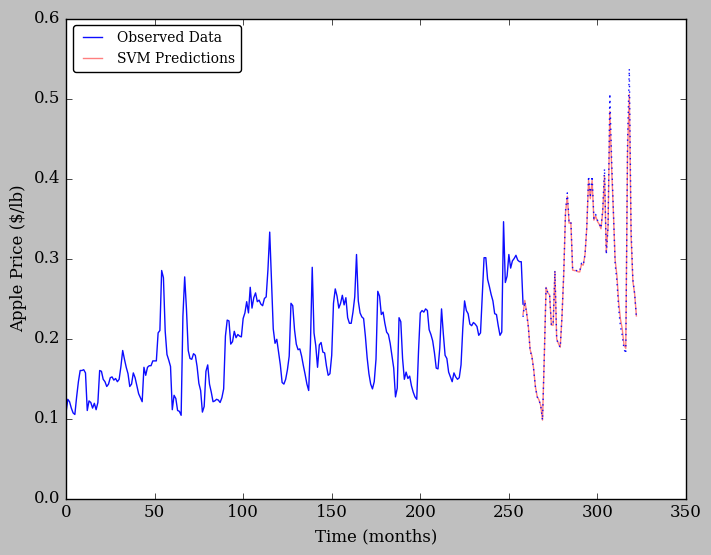

In [76]:
plot(arange(0,len(X_train_scaled)), y_train,'b-', alpha=0.95, label='Observed Data')
plot(arange(0,len(X_test_scaled))+train_idx-1, clf.predict(X_test_scaled),'r-', alpha=0.5, label='SVM Predictions')
plot(arange(0,len(X_test))+train_idx-1, y_test,'b:', alpha=0.95)
plt.legend(fancybox=True, loc=2, prop={'size':10})
xlabel('Time (months)');ylabel('Apple Price ($/lb)') ### prices received by growers 
plt.show()